# Netflix Movies and TV Shows

## source: https://www.kaggle.com/shivamb/netflix-shows?select=netflix_titles.csv
## This dataset consists of tv shows and movies available on Netflix as of 2019

## 1. Cài đặt thư viện

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math as mt
import seaborn as sns

## 2. Đọc file và xem thông tin của dataframe

In [2]:
data_df = pd.read_csv('data/netflix_titles.csv')
data_df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."


In [3]:
data_df.shape
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


### Thống kê dữ liệu thiếu theo các feautres

In [4]:
total = data_df.isnull().sum().sort_values(ascending=False)
total

director        1969
cast             570
country          476
date_added        11
rating            10
description        0
listed_in          0
duration           0
release_year       0
title              0
type               0
show_id            0
dtype: int64

In [5]:
precent = (data_df.isnull().sum()/data_df.isnull().count()).sort_values(ascending=False)
precent

director        0.315849
cast            0.091434
country         0.076355
date_added      0.001765
rating          0.001604
description     0.000000
listed_in       0.000000
duration        0.000000
release_year    0.000000
title           0.000000
type            0.000000
show_id         0.000000
dtype: float64

In [6]:
missing_data = pd.concat([total, precent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
director,1969,0.315849
cast,570,0.091434
country,476,0.076355
date_added,11,0.001765
rating,10,0.001604
description,0,0.000000
listed_in,0,0.000000
duration,0,0.000000
release_year,0,0.000000
title,0,0.000000


### Biểu diễn trên đồ thị

,Total,Percent
director,1969,0.315849
cast,570,0.091434
country,476,0.076355
date_added,11,0.001765
rating,10,0.001604


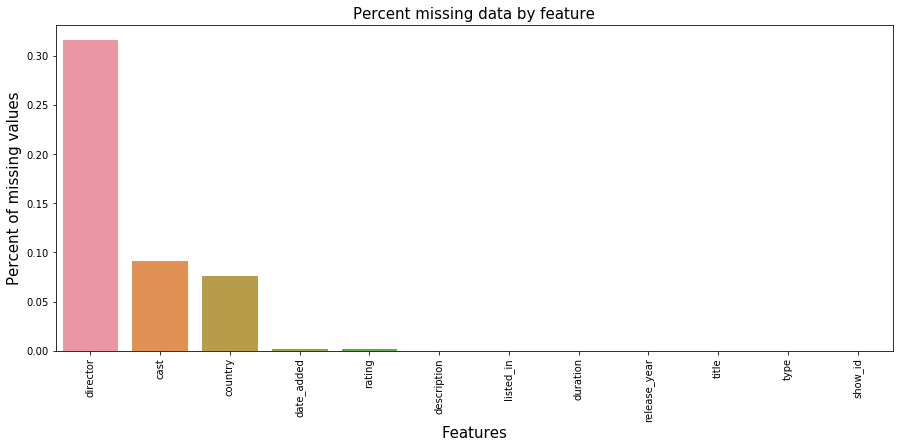

In [7]:
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
plt.savefig('image/datamisssing.png')
missing_data.head()

## 3. Các modul tính toán cơ bản

### Tính trung bình (mean)

In [8]:
def data_mean(data):
    a = len(data)
    sum = 0
    for i in range(len(data)):
        sum = sum + data[i]
    return sum/len(data)
    

In [9]:
data = data_df['show_id'].values
data_mean(data)

76703679.31985883

### Tính phương sai (variance), độ lệch chuẩn (std)

In [10]:
def data_variance(data):
    mean = data_mean(data)
    a = len(data)
    sum = 0
    for i in range(len(data)):
        sum = (mean - data[i])**2 + sum
    return sum/a , mt.sqrt(sum/a)

In [11]:
data_variance(data)

(119729266397711.88, 10942086.930641333)

### Tính trung vị (median), min, max

In [12]:
def data_median(data):
    data_sort = sorted(data)
    a = len(data_sort)
    index = (a-1) // 2
    if a % 2:
        return data_sort[0], data_sort[index], data_sort[a-1]
    else:
        return data_sort[0], (data_sort[index] + data_sort[index+1])/2.0, data_sort[a-1]

In [13]:
data_median(data)

(247747, 80163367.0, 81235729)

### Tính Quantiles

In [14]:
def data_quantiles(data):
    data_sort = sorted(data)
    a = len(data_sort)
    index_1 = (a-1)//4
    index_2 = (a-1)//2
    index_3 = int((a-1)*(3/4))
    return data_sort[index_1], data_sort[index_2], data_sort[index_3]

In [15]:
 data_quantiles(data)

(80035689, 80163366, 80244855)

# 4. Phân tích một số feature của bộ dữ liệu

## Type

In [16]:
def visualize_type():
    data_type = data_df['type'].values
    list_type = np.unique(data_type, return_counts= True)
    type_program = list_type[0]
    percent_program = list_type[1]
    Explode = [0, 0.1]
    plt.pie(percent_program, explode = Explode, labels = type_program, shadow = True, startangle = 45, autopct='%1.1f%%')
    plt.axis('equal')
    plt.legend(title ="Type")
    plt.title("Percent TV show and Movie",fontsize=15)
    plt.savefig('image/type.png')
    plt.show()
    

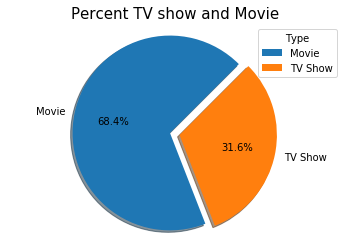

In [17]:
visualize_type()

## Title

In [18]:
def visualize_title():
    data_title = data_df['title'].values
    #print(data_title[1:5])
    list_data_title = np.unique(data_title)
    # number unique title
    unique_data_title = len(list_data_title)
    list_data_title = [list_data_title[i].split() for i in range(len(list_data_title))]
    list_title = []
    for i in range(len(list_data_title)):
        list_title = np.concatenate((list_title,list_data_title[i]))
    list_title = [list_title[i].lower() for i in range(len(list_title))]
    stop_work = ["The", "of", "the", "and", "in", "A", "&", "My", "to", "a" ,"2", 'i', 'me',
                 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 
                 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', 
                 "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 
                 "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do',
                 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for',
                 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 
                 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why',
                 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same',
                 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 
                 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', 
                 "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't",
                 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"] 
    for i in range(len(stop_work)):
        list_title = np.delete(list_title,np.where(list_title == stop_work[i]))
    list_title = np.unique(list_title, return_counts= True)
    a = list_title[0]
    b = list_title[1]
    dict_key_work = dict()
    for i in range(10):
        key_work = a[np.argmax(b)] 
        dict_key_work[key_work] = np.amax(b)
        a = np.delete(a,np.argmax(b))
        b = np.delete(b,np.argmax(b))
    return unique_data_title,  dict_key_work
    

In [19]:
unique_data_title,  dict_key_work = visualize_title()

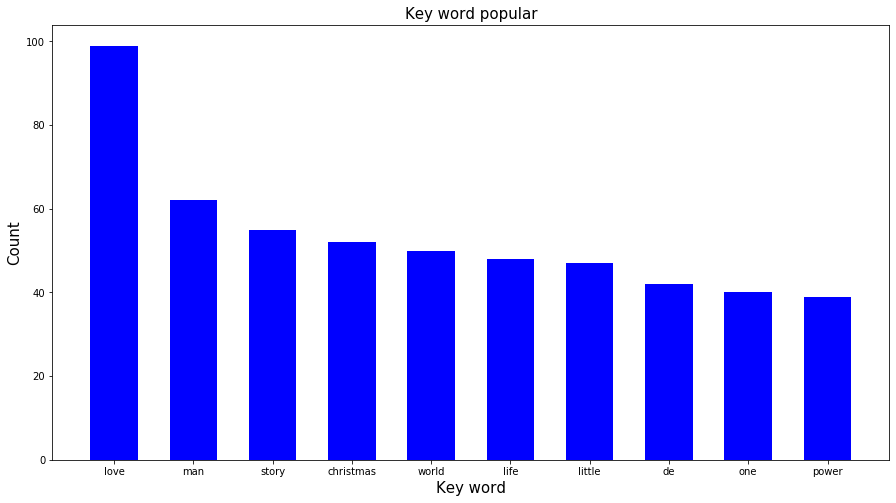

In [20]:
names = list(dict_key_work.keys())
values = list(dict_key_work.values())
plt.figure(figsize=(15, 8))
plt.bar(names, values, width=0.6, align='center', color ="blue")
plt.title("Key word popular",fontsize=15)
plt.xlabel("Key word",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.savefig('image/title.png')
plt.show()

## Duration
Total Duration - in minutes or number of seasons 

In [21]:
data_duration = data_df['duration'].values

In [22]:
data_duration

array(['90 min', '94 min', '1 Season', ..., '60 min', '2 Seasons',
       '10 Seasons'], dtype=object)

In [23]:
unique_data_duration = np.unique(data_duration, return_counts= True)

In [24]:
minitue = unique_data_duration[0].tolist()
count   = unique_data_duration[1].tolist()
list_minitue = {minitue[i] : count[i] for i in range(len(minitue))}
list_minitue

{'1 Season': 1321,
 '10 Seasons': 3,
 '10 min': 1,
 '100 min': 80,
 '101 min': 71,
 '102 min': 74,
 '103 min': 75,
 '104 min': 62,
 '105 min': 70,
 '106 min': 70,
 '107 min': 60,
 '108 min': 56,
 '109 min': 50,
 '11 Seasons': 3,
 '11 min': 1,
 '110 min': 69,
 '111 min': 43,
 '112 min': 41,
 '113 min': 40,
 '114 min': 33,
 '115 min': 31,
 '116 min': 49,
 '117 min': 40,
 '118 min': 45,
 '119 min': 47,
 '12 Seasons': 2,
 '12 min': 2,
 '120 min': 32,
 '121 min': 37,
 '122 min': 33,
 '123 min': 32,
 '124 min': 36,
 '125 min': 30,
 '126 min': 35,
 '127 min': 36,
 '128 min': 33,
 '129 min': 23,
 '13 Seasons': 2,
 '130 min': 30,
 '131 min': 23,
 '132 min': 27,
 '133 min': 28,
 '134 min': 18,
 '135 min': 28,
 '136 min': 15,
 '137 min': 33,
 '138 min': 12,
 '139 min': 13,
 '14 Seasons': 1,
 '14 min': 2,
 '140 min': 17,
 '141 min': 16,
 '142 min': 9,
 '143 min': 15,
 '144 min': 6,
 '145 min': 9,
 '146 min': 12,
 '147 min': 8,
 '148 min': 13,
 '149 min': 8,
 '15 Seasons': 2,
 '15 min': 1,
 '150 mi

In [25]:
list_minitue= sorted(list_minitue.items(), key=lambda x: x[1],reverse = True)

In [26]:
minitue_po = dict(list_minitue[0:10])

In [27]:
minitue_po

{'1 Season': 1321,
 '2 Seasons': 304,
 '3 Seasons': 158,
 '90 min': 111,
 '91 min': 104,
 '92 min': 101,
 '94 min': 94,
 '95 min': 94,
 '93 min': 90,
 '97 min': 88}

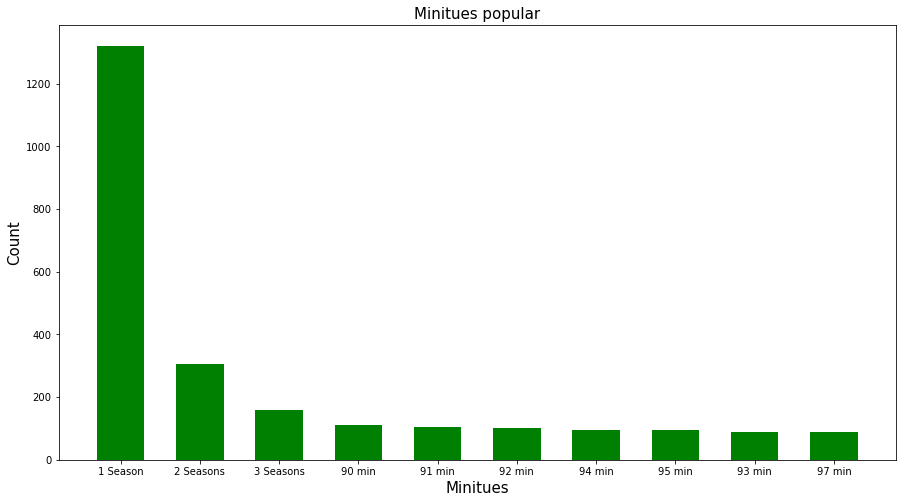

In [28]:
names = list(minitue_po.keys())
values = list(minitue_po.values())
plt.figure(figsize=(15, 8))
plt.bar(names, values, width=0.6, align='center', color ="green")
plt.title("Minitues popular",fontsize=15)
plt.xlabel("Minitues",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.savefig('image/duration.png')
plt.show()

## Growth in content over the years

In [29]:
def content_add_year():
    data_df["date_added"] = pd.to_datetime(data_df['date_added'])
    data_df['year_added'] = data_df['date_added'].dt.year
    data_df['month_added'] = data_df['date_added'].dt.month
    d1 = data_df[data_df["type"] == "TV Show"]
    d2 = data_df[data_df["type"] == "Movie"]
    col = "year_added"
    vc1 = (d1[col].value_counts()).to_dict()
    vc2 = (d2[col].value_counts()).to_dict()
    vc1 = dict(sorted(vc1.items()))
    vc2 = dict(sorted(vc2.items()))
    del vc1[2020.0]
    del vc2[2020.0]
    year_vc1 = list(vc1.keys())
    add_vc1 = list(vc1.values())
    year_vc2 = list(vc2.keys())
    add_vc2 = list(vc2.values())
    plt.figure(figsize=(10, 8))
    plt.plot(year_vc1 ,add_vc1, 'go-', label='TV-Show', color ="blue")
    plt.plot(year_vc2 ,add_vc2, 'ro-', label='Movie', color ="green")
    plt.title('Content added over the years',fontsize=15)
    plt.xlabel('Year', fontsize=15)
    plt.ylabel('Number',fontsize=15)
    plt.legend(loc='best')
    plt.savefig('image/content_add_year.png')
    plt.show()



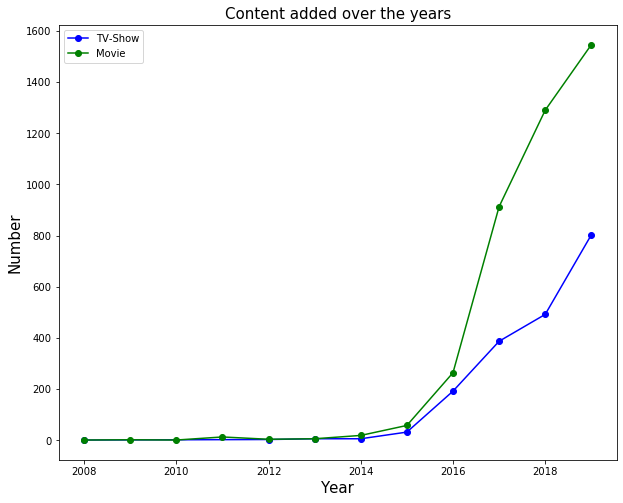

In [30]:
content_add_year()

## Content added over the month

In [31]:
def add_content_month():
    data_df["date_added"] = pd.to_datetime(data_df['date_added'])
    data_df['year_added'] = data_df['date_added'].dt.year
    data_df['month_added'] = data_df['date_added'].dt.month
    d1 = data_df[data_df["type"] == "TV Show"]
    d2 = data_df[data_df["type"] == "Movie"]
    col = "month_added"
    vc1 = (d1[col].value_counts()).to_dict()
    vc2 = (d2[col].value_counts()).to_dict()
    vc1 = dict(sorted(vc1.items()))
    vc2 = dict(sorted(vc2.items()))
    month_vc1 = list(vc1.keys())
    month_vc1 = [int(month_vc1[i]) for i in range(len(month_vc1))]
    add_vc1 = list(vc1.values())
    add_vc2 = list(vc2.values())
    index = np.arange(12)
    width = 0.30
    plt.figure(figsize=(15, 8))
    plt.bar(index, add_vc1, width, align='center', color ="blue", label = "TV-Show")
    plt.bar(index + width, add_vc2, width, align='center', color ="green", label = "Moive")
    plt.title("Content added over the month",fontsize=15)
    plt.xlabel("Month",fontsize=15)
    plt.ylabel("Count",fontsize=15)
    plt.xticks(index+width/2, month_vc1)
    plt.legend(loc='best',fontsize=12)
    plt.savefig('image/add_month.png')
    plt.show()
    

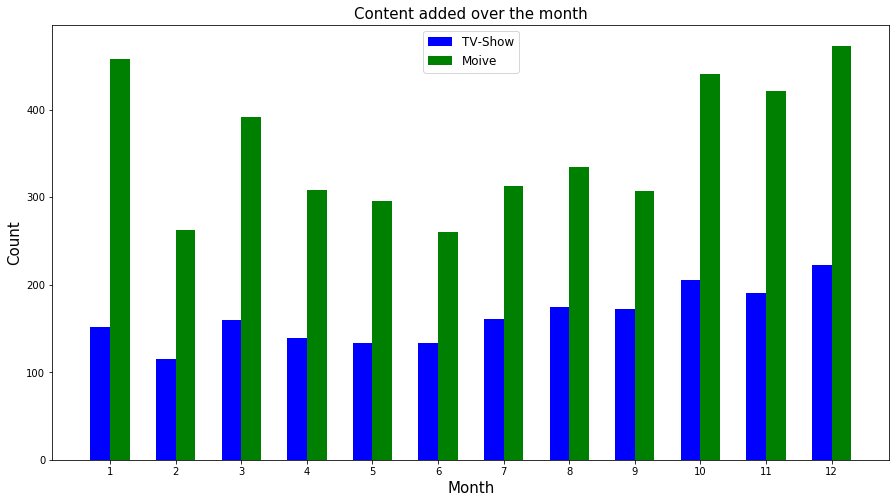

In [32]:
add_content_month()

## Content from different Countries

In [33]:
data_country = (data_df['country'].dropna()).values
country = []
for i in range(len(data_country)):
    country = country + data_country[i].split(", ")
country = np.unique(np.array(country),return_counts= True)
print("count_country:", len(country[0]))
print(country[0])
name_country = country[0]
count_country = country[1]
dict_country = dict()
for i in range(len(country[0])):
    dict_country[name_country[i]] = count_country[i]



count_country: 113
['Afghanistan' 'Albania' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bangladesh' 'Belgium' 'Bermuda' 'Botswana' 'Brazil'
 'Bulgaria' 'Cambodia' 'Canada' 'Cayman Islands' 'Chile' 'China'
 'Colombia' 'Croatia' 'Cuba' 'Cyprus' 'Czech Republic' 'Denmark'
 'Dominican Republic' 'East Germany' 'Ecuador' 'Egypt' 'Finland' 'France'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Guatemala' 'Hong Kong' 'Hungary'
 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy'
 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Kuwait' 'Latvia' 'Lebanon'
 'Liechtenstein' 'Luxembourg' 'Malawi' 'Malaysia' 'Malta' 'Mauritius'
 'Mexico' 'Mongolia' 'Montenegro' 'Morocco' 'Namibia' 'Nepal'
 'Netherlands' 'New Zealand' 'Nicaragua' 'Nigeria' 'Norway' 'Pakistan'
 'Panama' 'Paraguay' 'Peru' 'Philippines' 'Poland' 'Poland,' 'Portugal'
 'Qatar' 'Romania' 'Russia' 'Samoa' 'Saudi Arabia' 'Senegal' 'Serbia'
 'Singapore' 'Slovakia' 'Slovenia' 'Somalia' 'South Africa' 'South Korea'
 'Soviet Un

In [34]:
dict_country = sorted(dict_country.items(), key=lambda x: x[1],reverse = True)

In [35]:
country_popular = dict(dict_country[0:15])
country_popular

{'United States': 2609,
 'India': 838,
 'United Kingdom': 601,
 'Canada': 318,
 'France': 271,
 'Japan': 231,
 'Spain': 178,
 'South Korea': 162,
 'Germany': 151,
 'Mexico': 129,
 'Australia': 126,
 'China': 120,
 'Hong Kong': 97,
 'Turkey': 87,
 'Taiwan': 75}

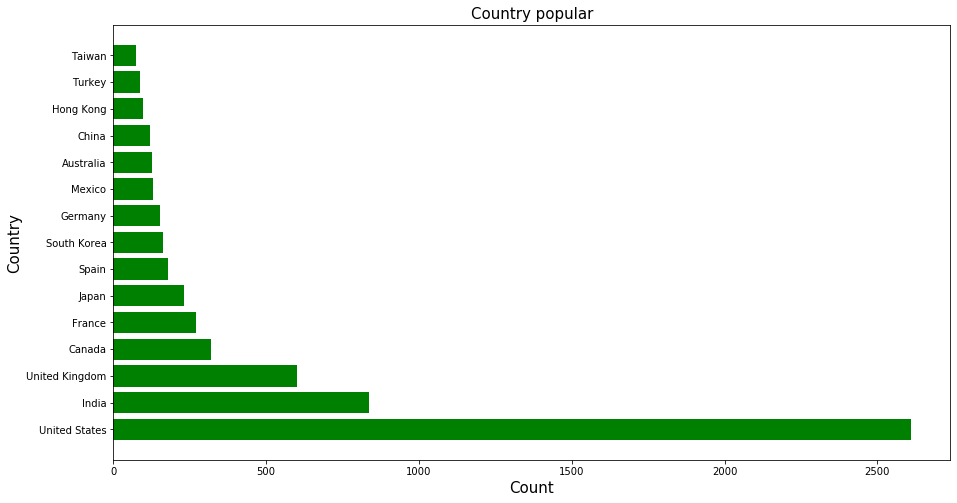

In [36]:
names = list(country_popular.keys())
values = list(country_popular.values())
plt.figure(figsize=(15, 8))
plt.barh(names, values, align='center', color ="green")
plt.title("Country popular",fontsize=15)
plt.xlabel("Count",fontsize=15)
plt.ylabel("Country",fontsize=15)
plt.savefig('image/country.png')
plt.show()